# Gaussian Processes for Machine Learning

## Gaussian Processes 

A Gaussian proccess is a paricular type of stochastic process. *But what do we understand by a stochastic process?* Typically, a stochastic process denotes a collection of random variables with a time dependence. Hence, the term *stochastic* is justified by the consideration of *random variables* and *process* relates to the *time dependence*. 
We state the following brief definition:

```{admonition} Definition
:class: tip
:name: def:tsp
A **(temporal) stochastic process** is a collection of $\mathbb{R}^d$-valued random variables $(X_t)_{t \in \mathcal{I}}$, where either $\mathcal{I} = \mathbb{N}$ (discrete-time) or $\mathcal{I} = \mathbb{R}_{\ge 0}$ (continuous-time).
```

Hence, this kind of stochastic process describes the temporal process of random events. In this context, it makes sense to say that the outcome of $X_s$ happended before $X_t$ for $s < t$. Keep in mind that each random variable $X_t$ is a map $X_t: \Omega \rightarrow \mathbb{R}^d$ and $X_t(\omega)$ for $\omega \in \Omega$ is the outcome of a random experiment. The use of a stochastic process makes it possible to consider the outcomes of all random variables simultaneously. In this way, a so-called **sample path** or **random path** $(X_t(\omega))_{t \in \mathcal{I}}$ is obtained. The shape of these paths depend strongly on the underlying properties of the stochastic process.

A very famous example is **Brownian motion** or **Wiener process** which has numerous applications in physics, finance, biology and many other areas. For example, the movement of a large particle (like pollen) due to collisions with small particles (like water molecules). A nice simulation can be found on the website of Andrew Duffy at Boston University (please click on the image to follow the link):

<a href="http://physics.bu.edu/~duffy/HTML5/brownian_motion.html"> <center><img src="BManim.gif"></center></a>

Please note that the 2d simulation shows the current position of some particle as well as its previous path. In one dimension, we can easily simulate sample paths of Brownian motion starting at $X_0 =0$ and plot the result as position against time:

<img src="bm.gif" width="800px" alt="Brownian motion"/>

The concept can be generalized to general index sets and in particular, to $\mathbb{R}^d$. In the preceding animation time-dependent random functions are genarted, i.e., for each input $t$ is mapped to a random variable $f(t)$ ($X_t$ with the earlier notation). For our machine learning applications we are interested in general inputs $x \in \mathbb{R}^d$ with scalar random variables $f(x)$. In other words, a time-index is to restrictive and therefore, we generalize the idea to general index sets. Moreover, in view of the nice properties of normal distributions an additional property is supposed:

```{admonition} Definition
:class: tip
:name: def:gp
A Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution.{cite}```Rasmussen2006```
```

Henceforth, a Gaussian process is denoted by $(f(x))_{x \in \mathcal{I}}$. We assume that the random variables $f(x)$, $x \in \mathcal{I}$, take values in $\mathbb{R}$. Moreover, $\mathcal{I} = \mathbb{R}^d$ for some $d \in \mathbb{N}$ unless stated otherwise. In this case, $(f(x))_{x \in \mathcal{I}}$ is also called a **random field**. The additional Gaussian condition means that for an arbitrary number of elements $x_i \in \mathbb{R}^d$, $i=1, \dots, n$, the $\mathbb{R}^n$-valued random vector 

$$\begin{pmatrix} f(x_1) \\ f(x_2) \\ \vdots \\ f(x_n) \end{pmatrix}$$

is mulivariate normally distributed. By construction the Gaussian process yields random functions from $\mathbb{R}^d$ to $\mathbb{R}$. Moreover, Brownian motion is a specific Gaussian process.

In {ref}```def:multnormal```, we have seen that a multivariate normal distribution is uniquely characterized by its mean $\mu$ and covariance $\Sigma$. A Gaussian process is an infinite-dimensional analogue if the index set is infinite. Indeed, we can select an arbitrary number of $x_i$ values and consider the corresponding multivariate normal distribution of arbitrary dimension. It turns out that **a Gaussian process is also specified by its mean and covariance, but they are functions instead of a vector and a matrix**. More precisely, the **mean** is a function

$$m: \mathbb{R}^d \rightarrow \mathbb{R}, x \mapsto m(x)$$

and the **covariance function** or **kernel** is a function of two variables

$$k: \mathbb{R}^d \times \mathbb{R}^d \mapsto \mathbb{R}, (x, x^{\prime}) \mapsto k(x, x^{\prime})$$

Then, the finite-dimensional distributions of the Gaussian process are given by $m$ and $k$, i.e., the distribution of 

$$\begin{pmatrix} f(x_1) \\ f(x_2) \\ \vdots \\ f(x_n) \end{pmatrix} \sim \mathcal{N}(\mu, \Sigma)$$

is specified by

$$\mu = \begin{pmatrix} m(x_1) \\ m(x_2) \\ \vdots \\ m(x_n) \end{pmatrix}$$

and 

$$\Sigma = \begin{pmatrix} k(x_1, x_1) & k(x_1, x_2) & \dots & k(x_1, x_n) \\ 
k(x_2, x_1) & k(x_2, x_2) & \dots & k(x_2, x_n) \\ 
\vdots & \vdots & \ddots & \vdots \\ 
k(x_n, x_1) & k(x_n, x_2) & \dots & k(x_n, x_n) \end{pmatrix}$$

Thus, a Gaussian process is specified by choosing a mean function $m$ and a kernel $k$. We also write

$$ f \sim \mathcal{GP}(m, k).$$

If $m$ is zero, the corresponding Gaussian process is called **centered**.

The kernel $k$ generates the covariance matrix $\Sigma$ and the covariance of a multivariate normal distiribution possesses certain properties such as symmetry and positive definiteness. Consequently, a general function of two variables will not be a valid covariance function of a Gaussian process. Clearly, a covariance function is necessarily **symmetric**, i.e., $k(x, x^{\prime}) = k(x^{\prime}, x)$ for $x, x^{\prime} \in \mathcal{I}$. **Positive definiteness** of covariance function can also be defined, but requires some additional mathematical background (refer to (4.2) in {cite}```Rasmussen2006```).

A kernel $k$ is called **stationary** if it depends only on the difference of two inputs, i.e., $k(x, x^{\prime})$ depends only on $x - x^{\prime}$ for $x, x^{\prime} \in \mathbb{R}^d$. Furthermore, it is even **isotropic** if it depends only on the distance $r = |x - x^{\prime}|$.

The choice of $k$ determines the properties of the sample paths of the Gaussian process. For example, the paths can be very rough as for Brownian motion or they can be very smooth as for the squared exponential or RBF kernel:

<img src="smooth.gif" width="800px" alt="Gaussian process"/>

## Gaussian Process Regression

In the machine learning context, Gaussian processes are used for **Gaussian process regression** or **kriging**. We have some data set $\mathcal{D}$ of training observations

$$\mathcal{D} = \{ (x_i, y_i)~|~x_i \in \mathbb{R}^d, y_i \in \mathbb{R} \quad \text{for } i=1,\dots,n \}$$

similarly to the example in {ref}```sec:linregr```, but now the **functional relation** between inputs $x_i$ and outputs $y_i$ is not necessarily linear. Instead of all possible sample paths of the Gaussian process only those paths are considered which match the training data:

<img src="gaussianregr.gif" width="800px" alt="Cond Gaussian process"/>

Typically, the **mean function is chosen to be zero**. Otherwise $m$ would already approximate the dependence of the output $y$ of the input $x$. Learning this relation is purpose of the regression model. However, if we still like to use a non-zero mean $m$, this can also be done by substracting $m(x_i)$ from y_i and fit a centered model on the residuals. Thus, we always make the assumption $m=0$, i.e., we only consider centered Gaussian processes.

For a test point $x^*$ the **distribution of** $f(x^*)$ **given the data** $\mathcal{D}$ is the {ref}```conditional distribution<lem:condnormaldistr>``` which can be computed explicitly, since we are dealing with normal distributions. The prediction of the model at $x^*$ is given by the mean of the conditional distribution and the uncertainty is quantified by the variance which corresponds to the variability of the string in the preceding animation. As seen before, this uncertainty can also be expressed in terms of credible intervals:

<img src="gaussianregr.png" alt="Cond Gaussian process"/>

The following interactive plot shows how the distribution of one component of a two dimensional normally distributed random vector behaves if the other component is fixed. The main observation is that the fixed value has no impact on the other component if the correlation is zero. In this case, the two components are independent. Moreover, the impact increases as the absolute value of the correlation increases. This means for Gaussian process regression that the impact of training points $x$ on the prediction for test points $x^*$ depends on the variance $k(x, x^*)$. Please open the notebook in Google Colab to use the visualization.

In [1]:
from IPython.display import display, clear_output
!pip install ipympl
clear_output()

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import interact, FloatSlider
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set_style('darkgrid')

# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    tmp = np.stack((x1, x2), axis=-1)
    pdf = multivariate_normal.pdf(tmp, mean=mean[:, 0], cov = covariance)
    return x1, x2, pdf

@interact(x_condition=FloatSlider(value=1., min=-2, max=2, step=0.1, continuous_update=False), 
          y_condition=FloatSlider(value=-1., min=-2, max=2, step=0.1, continuous_update=False), 
          correlation=FloatSlider(value=0., min=-0.995, max=0.995, step=0.001, continuous_update=False))
def plot_conddistr(x_condition, y_condition, correlation):
    d = 2  # dimensions
    mean = np.array([[0.], [0.]])
    cov = np.matrix([
        [1, correlation], 
        [correlation, 1]
    ])

    # Get the mean values from the vector
    mean_x = mean[0,0]
    mean_y = mean[0,0]
    # Get the blocks (single values in this case) from 
    #  the covariance matrix
    A = cov[0, 0]
    B = cov[1, 1]
    C = cov[0, 1]  # = C transpose in this case
    # Calculate x|y
    mean_xgiveny = mean_x + C /B * (y_condition - mean_y)
    cov_xgiveny = A - C**2 /B

    # Calculate y|x
    mean_ygivenx = mean_y + C /A * (x_condition - mean_x)
    cov_ygivenx = B - C**2 /A
    # Plot the conditional distributions
    fig = plt.figure(figsize=(9, 9))
    gs = gridspec.GridSpec(
        2, 2, width_ratios=[1.5, 1], height_ratios=[1.5, 1],
        hspace=0.25)
    plt.suptitle('Conditional distributions', y=0.93)

    # Plot surface on top left
    ax1 = plt.subplot(gs[0])
    x, y, p = generate_surface(mean, cov, d)
    # Plot bivariate distribution
    con = ax1.contourf(x, y, p, 33, cmap='turbo')
    # y=1 that is conditioned upon
    ax1.plot([-3.5, 3.5], [y_condition, y_condition], 'r--')
    # x=-1. that is conditioned upon
    ax1.plot([x_condition, x_condition], [-3.5, 3.5], 'b--')
    ax1.set_xlabel('$x$', fontsize=13)
    ax1.set_ylabel('$y$', fontsize=13)
    ax1.yaxis.set_label_position('right')
    ax1.axis([-3.5, 3.5, -3.5, 3.5])

    # Plot y|x
    ax2 = plt.subplot(gs[1])
    yx = np.linspace(-5, 5, num=250)
    pyx = norm.pdf(yx, loc=mean_ygivenx, scale=np.sqrt(cov_ygivenx))
    # Plot univariate distribution
    ax2.plot(pyx, yx, 'b--', 
             label=f'$p(y|x={x_condition:.1f})$')
    ax2.legend(loc=0)
    ax2.set_xlabel('density', fontsize=13)
    ax2.set_xscale('symlog')
    ax2.set_xlim(0., 4.)
    ax2.set_ylim(-3.5, 3.5)
    title2 = r'$\mu_{y|x} =$' + '{:.2f}, '.format(mean_ygivenx)
    title2 += r'$\sigma_{y|x}^2 =$' + '{:.2f}'.format(cov_ygivenx)
    ax2.set_title(title2)

    # Plot x|y
    ax3 = plt.subplot(gs[2])
    xy = np.linspace(-5, 5, num=250)
    pxy = norm.pdf(xy, loc=mean_xgiveny, scale=np.sqrt(cov_xgiveny))
    # Plot univariate distribution
    ax3.plot(xy, pxy, 'r--', 
             label=f'$p(x|y={y_condition:.1f})$')
    ax3.legend(loc=0)
    ax3.set_ylabel('density', fontsize=13)
    ax3.yaxis.set_label_position('right')
    ax3.set_xlim(-3.5, 3.5)
    ax3.set_yscale('symlog')
    ax3.set_ylim(0., 4.)
    title3 = r'$\mu_{x|y} =$' + '{:.2f}, '.format(mean_xgiveny)
    title3 += r'$\sigma_{x|y}^2 =$' + '{:.2f}'.format(cov_xgiveny)
    ax3.set_title(title3)

    # Clear axis 4 and plot colarbar in its place
    ax4 = plt.subplot(gs[3])
    ax4.set_visible(False)
    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('left', size='20%', pad=0.05)
    cbar = fig.colorbar(con, cax=cax)
    cbar.ax.set_ylabel('density: $p(x, y)$', fontsize=13)
    plt.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='x_condition', max=2.0, min=…

The general equations for Gaussian process regression are derived as follows. Let 

$$X = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}$$

be the so called **sample matrix** and denote by

$$Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}$$

the associated **labels**. $X$ and $Y$ split the training data $\mathcal{D}$ into inputs and outputs. Assume that we have some test points

$$X^* = \begin{pmatrix} x^*_1 \\ x^*_2 \\ \vdots \\ x^*_m \end{pmatrix}$$

for some $m \in \mathbb{N}$. Our goal is to determine the distribution of 

$$f(X^*) := \begin{pmatrix} f(x^*_1) \\ f(x^*_2) \\ \vdots \\ f(x^*_m) \end{pmatrix}$$

given

$$\begin{pmatrix} f(x_1) \\ f(x_2) \\ \vdots \\ f(x_n) \end{pmatrix} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}$$

Since we use a Gaussian process with zero mean, we know that 

$$\begin{pmatrix} f(x^*_1) \\ f(x^*_2) \\ \vdots \\ f(x^*_m) \\ f(x_1) \\ f(x_2) \\ \vdots \\ f(x_n) \end{pmatrix} \sim \mathcal{N}(0, \Sigma)$$

The kernel $k$ determines the covariance matrix $\Sigma$. We use the notation

$$K(X, X^*) = \begin{pmatrix} k(x_1, x^*_1) & k(x_1, x^*_2) & \dots & k(x_1, x^*_m) \\ 
k(x_2, x^*_1) & k(x_2, x^*_2) & \dots & k(x_2, x^*_m) \\ 
\vdots & \vdots & \ddots & \vdots \\ 
k(x_n, x^*_1) & k(x_n, x^*_2) & \dots & k(x_n, x^*_m) \end{pmatrix}$$

$K(X, X)$, $K(X^*, X^*)$ and $K(X^*, X)$ are defined accordingly. Consequently, it follows

$$\Sigma = \begin{pmatrix} K(X^*, X^*) & K(X^*, X) \\ K(X, X^*) & K(X, X) \end{pmatrix}$$

Finally, we can apply {ref}```conditional distribution formula<lem:condnormaldistr>``` to deduce the following:

```{admonition} Lemma
:class: important
:name: lem:gpregr
Gaussian process regression predicts the distribution of $f(X^*)$ given the data $\mathcal{D}$ by a multivariate normally distributed with mean

$$\mu^* = K(X^*, X) K(X, X)^{-1} Y$$

and covariance

$$\Sigma^* = K(X^*, X^*) - K(X^*, X) K(X, X)^{-1} K(X, X^*)$$
```

The term $\alpha := K(X, X)^{-1} Y$ is a vector of size $n$ which is independent of $x^*$. Moreover, for a single test point $x^*$ the covariance matrix $K(x^*, X)$ reduces to a row vector. Hence, it holds

$$\mu^* = K(x^*, X) \alpha = \sum_{i=1}^n \alpha_i~ k(x^*, x_i).$$

In other words, the **mean prediction is a linear combination of the functions** $k(\cdot, x_i)$, $i=1, \dots, n$. The weights $\alpha_i$, $i=1,\dots,n$, are constructed such that the training data is fitted exactly (see plot above). This is **only possible if the inverse matrix** $K(X, X)^{-1}$ **exists**. This might not always the case. Think of the linear regression example including noise in the data. In this case, it is not possible to find a linear function which fits the data exactly. Furthermore, we possibly do not like to obtain a perfect fit, since we suppose that our training data contains noise. In order to solve this issue, a **noise term** $\sigma_n^2 > 0$ is added to the covariance related to the training data, i.e., $K(X, X)$ is replaced by $K(X, X) + \sigma_n^2 I_n$, where $I_n$ denotes the identity matrix. In this way, the variance of $f(x_i)$, $i=1,\dots,n$, is increased by $\sigma_n^2$. Adding noise is additionally useful to **avoid numerical problems**, since it has a regularizing effect. Indeed, the inverse matrix $K(X, X)^{-1}$ might exist mathematically. However, if the matrix is "almost singular", it is often not possible to compute $K(X, X)^{-1}$. It holds

```{admonition} Lemma
:class: important
:name: lem:gpregrnoise
Gaussian process regression with noise $\sigma_n^2$ predicts the distribution of $f(X^*)$ given the data $\mathcal{D}$ by a multivariate normally distributed with mean

$$\mu^* = K(X^*, X) \big(K(X, X) + \sigma_n^2 I_n\big)^{-1} Y$$

and covariance

$$\Sigma^* = K(X^*, X^*) - K(X^*, X) \big(K(X, X) + \sigma_n^2 I_n\big)^{-1} K(X, X^*)$$
```

## Examples of Kernels 

As mentioned before, the choice of the kernel determines the properties of the Gaussian process and consequently also of the regression model. In the present section, we define the most common covariance functions and visualize the corresponding sample paths.

<IPython.core.display.Javascript object>


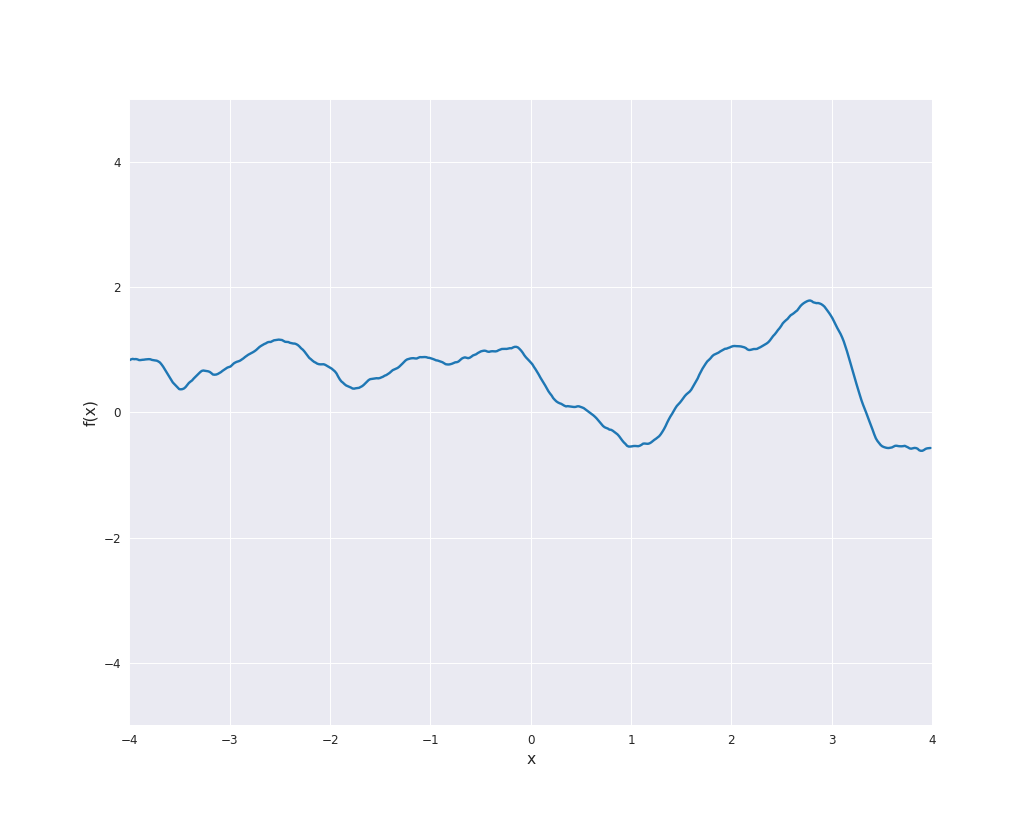

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
import seaborn as sns
sns.set_style('darkgrid')

# animation for paths of a Gaussian process
# kernel specifies the covariance function
# x-values from -xbnd to xbnd
# y-axis has values from -ybnd to ybnd
# saves gif if string is passed to name
def get_anim(kernel, xbnd=10., ybnd=2.5, name=None):
    nb_steps = 500
    delta_x = 2*xbnd / nb_steps
    x = np.arange(-xbnd, xbnd, delta_x)
    mean = np.zeros_like(x)
    cov = kernel(x.reshape(-1, 1))

    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure(num=' ', figsize=(10, 8))
    ax = plt.axes(xlim=(-xbnd, xbnd), ylim=(-ybnd, ybnd))
    ax.set_xlabel('x', fontsize=13)
    ax.set_ylabel('f(x)', fontsize=13)
    line, = ax.plot([], [], lw=2)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x = np.arange(-xbnd, xbnd, delta_x)
        samples = np.random.multivariate_normal(mean, cov)
        line.set_data(x, samples)
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = FuncAnimation(fig, animate, init_func=init,
                         frames=50, interval=400, blit=True) #, repeat=False)
    if name is not None:
        anim.save(name + '.gif', writer=FFMpegFileWriter(fps=2)) #, dpi=200)
    return anim

# common kernels:
from sklearn.gaussian_process.kernels import DotProduct # linear kernel
from sklearn.metrics.pairwise import polynomial_kernel # polynomial kernel
from sklearn.gaussian_process.kernels import RBF # squared exponential kernel
from sklearn.gaussian_process.kernels import Matern # Matern kernel
from sklearn.gaussian_process.kernels import RationalQuadratic # rational quadratic kernel
from sklearn.gaussian_process.kernels import ExpSineSquared # periodic kernel

# example
kernel = Matern(nu=1.5) 
anim = get_anim(kernel, xbnd=4., ybnd=5.)

### Linear Kernel

The linear kernel reads

$$k(x, x^{\prime}) = \sigma_0^2 + \langle x, x^{\prime} \rangle \quad \text{for } x, x^{\prime} \in \mathbb{R}^d,$$

where $\sigma_0^2 \ge 0$ and $\langle x, x^{\prime} \rangle$ denotes the scalar product of $x$ and $x^{\prime}$. In the subsequent animation, we used $\sigma_0^2 = 0$.

<img src="linear.gif" width="800px" alt="Linear kernel"/>

### Polynomial Kernel

The polynomial kernel is constructed by exponentiation of the linear kernel, i.e.,

$$k(x, x^{\prime}) = \big(\sigma_0^2 + \langle x, x^{\prime} \rangle\big)^p \quad \text{for } x, x^{\prime} \in \mathbb{R}^d,$$

where $\sigma_0^2 \ge 0$ and $p \in \mathbb{N}$. In the subsequent animation, we used $\sigma_0^2 = 1$ and $p=3$.

<img src="polynomial.gif" width="800px" alt="Polynomial kernel"/>

### Squared Exponential Kernel

The squared exponential kernel is possibly the most important kernel in kernel-based machine learning. It is also called radial basis function (RBF) kernel. It is defined by 

$$k(x, x^{\prime}) = \exp \big(-\frac{r^2}{2~l^2} \big)$$

where $r = |x - x^{\prime}|$ for $x, x^{\prime} \in \mathbb{R}^d$. $l$ is called **length scale** and is assumed to be positive. In particular, the squared exponential kernel is isotropic. In the subsequent animation, we used $l=1$.

<img src="rbf.gif" width="800px" alt="RBF kernel"/>

### Exponential Kernel

The (absolute) exponential kernel is another isotropic kernel and is defined by 

$$k(x, x^{\prime}) = \exp \big(-\frac{r}{l} \big)$$

where $r = |x - x^{\prime}|$ for $x, x^{\prime} \in \mathbb{R}^d$ and $l$ is the length scale. In the subsequent animation, we used $l=1$.

<img src="exp.gif" width="800px" alt="Exp kernel"/>

### Mat&eacute;rn Kernel

The Mat&eacute;rn kernel denotes a class of isotropic kernels which is parametrized by a parameter $\nu > 0$. The kernel is given by

$$k_{\nu}(x, x^{\prime}) = \frac{2^{1 - \nu}}{\Gamma(\nu)}~\Big(\frac{\sqrt{2\nu}~ r}{l}\Big)^{\nu} ~K_{\nu} \Big(\frac{\sqrt{2\nu}~r}{l}\Big),$$

where $r = |x - x^{\prime}|$ for $x, x^{\prime} \in \mathbb{R}^d$, $l >0$ is the length scale, $\Gamma$ is the gamma function and $K_{\nu}$ is a modified Bessel function.

For $\nu = 0.5$ the Mat&eacute;rn kernel becomes the exponential kernel and for $\nu \rightarrow \infty$ the Mat&eacute;rn kernel approaches the squared exponential kernel. Thus, $\nu$ determines the roughness of the samples paths and the samples paths get smoother as $\nu$ increases.

The most interesting other cases for machine learning are $\nu = 1.5$ and $\nu = 2.5$. It holds

$$k_{\nu = 1.5}(x, x^{\prime}) = \Big( 1 + \frac{\sqrt{3}~r}{l} \Big)~\exp\Big(\frac{\sqrt{3}~r}{l}\Big)$$

and 

$$k_{\nu = 2.5}(x, x^{\prime}) = \Big( 1 + \frac{\sqrt{5}~r}{l} + \frac{5~r^2}{3~l^2} \Big)~\exp\Big(\frac{\sqrt{5}~r}{l}\Big).$$

For both cases, sample paths are animated below with $l=1$.

$\nu = 1.5$:

<img src="matern15.gif" width="800px" alt="Matern 1.5 kernel"/>

$\nu = 2.5$:

<img src="matern25.gif" width="800px" alt="Matern 2.5 kernel"/>

### Rational Quadratic Kernel

The rational quadratic kernel denotes a family of isotropic kernels with parameter $\alpha > 0$ defined by

$$k_{\alpha}(x, x^{\prime}) = \Big( 1 + \frac{r^2}{2\alpha~l^2} \Big)^{-\alpha}$$

with $r = |x - x^{\prime}|$ for $x, x^{\prime} \in \mathbb{R}^d$ and $l > 0$. This kernel can be seen as mixture of squared exponential kernels with different length scales (see (4.20) in {cite}```Rasmussen2006```). In the subsequent animation, we used $\alpha = l = 1$.

<img src="rq.gif" width="800px" alt="rq kernel"/>

### Periodic Kernel

The periodic kernel is also called Exp-Sine-Squared kernel. It is given by

$$k(x, x^{\prime}) = \exp\Big( - \frac{2~\sin^2\big(\pi \frac{r}{p}\big)}{l^2}\Big)$$

with $r = |x - x^{\prime}|$ for $x, x^{\prime} \in \mathbb{R}^d$. $l$ is the length scale and $p$ the **periodicity**. To illustrate the sample paths we used $l=p=1$.

<img src="periodic.gif" width="800px" alt="Periodic kernel"/>

### Brownian Motion Kernel

Since we illustrated the sample paths of Brownian motion as an example for a stochastic process, we state its covariance function. Nevertheless, this kernel is not of interest for our machine learning applications. It holds

$$k(s, t) = \text{min}(s, t)$$

for $s, t \in \mathbb{R}_{\ge 0}$.

### Combination of Kernels

It is possible to obtain new covariance functions from known kernels by recombination.

Let $(f_1(x))_{x \in \mathbb{R}^d}$ and $(f_2(x))_{x \in \mathbb{R}^d}$ be two independent centered Gaussian processes with kernels $k_1$ and $k_2$, respectively. Moreover, let $a : \mathbb{R}^d \rightarrow \mathbb{R}_{> 0}$. Then, sums and products can be used to generate new kernels $k$ and Gaussian processes $f$ from old ones:

| Gaussian process | kernel $k(x, x^{\prime})$ |
|:--------------------------|----------:|
| $f_1 + f_2$ | $k_1(x, x^{\prime})+k_2(x, x^{\prime})$ |
| $f_1 f_2$ | $k_1(x, x^{\prime}) k_2(x, x^{\prime})$ |
| $a f_1$ | $a(x) k_1(x, x^{\prime}) a(x^{\prime})$ |

Of course, a constant $a$ can be used for scaling and the three approaches can be combined arbitrarily.

For example, by multiplication of the periodic kernel with the squared exponential kernel the **locally periodic kernel** is constructed:

$$k(x, x^{\prime}) = \exp\Big( - \frac{2~\sin^2\big(\pi \frac{r}{p}\big)}{l^2}\Big) \exp \Big(-\frac{r^2}{2~l^2} \Big),$$

where $r = |x - x^{\prime}|$ for $x, x^{\prime} \in \mathbb{R}^d$.

The sample paths are indeed locally periodic, i.e., the periodic part changes over time: 

In [3]:
kernel1 = ExpSineSquared()
kernel2 = RBF()

def kernel(x):
    return np.multiply(kernel1(x), kernel2(x))

# anim = get_anim(kernel, xbnd=4., ybnd=5.)

<img src="locperiodic.gif" width="800px" alt="locally periodic kernel"/>

For additional techniques for creating new covariance functions please refer to section 4.2.4 in {cite}```Rasmussen2006```.

## Impact of Hyperparameters


## Selection of Hyperparameters


## Gaussian Process Classification

```{bibliography}
:filter: docname in docnames
:style: plain
```